In [1]:
import os
import sys
sys.path.insert(0, "..")
import gc
gc.enable()

In [2]:
import os
import sys
sys.path.insert(0, os.getcwd())
from utils.DataLoader import  DataLoader
from utils.utilities import *
from utils.visualization import *
from models.fcn16 import FCN16
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

tf.debugging.set_log_device_placement(True)
dl = DataLoader()

Using TensorFlow backend.


Num GPUs Available:  1


In [3]:
train_df, valid_df = dl.train_split(0.2, filterNan=True)
print("train set shape", train_df.shape)
print("validation set shape", valid_df.shape)

train set shape (7632, 5)
validation set shape (1908, 5)


In [4]:
grouped_images_gen = dl.get_grouped_images_gen(train_df)#, f="adaptive_equalization") # applying filters increases dramatically the execution time
aug_gen = get_augmented_images_generator(grouped_images_gen)
valid_x, valid_y = next(dl.get_grouped_images_gen(valid_df, batch_size=500))#, f="adaptive_equalization")) #valid_df.shape[0]))

In [7]:
# todo adjust output to classes number

t_x, t_y = next(aug_gen)
x_shape =np.squeeze(t_x[0]).shape
print(x_shape)
fcn_model = FCN16(x_shape, "../models/serialized/")
fcn_model.compile()

(256, 256, 3)
Convolution size: 8
Deconvolution size: 18
Extra size: 2
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
permute_1_input (InputLayer)    [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
permute_1 (Permute)             (None, 256, 256, 3)  0           permute_1_input[0][0]            
__________________________________________________________________________________________________
conv1_1 (Conv2D)                (None, 256, 256, 64) 1792        permute_1[0][0]                  
__________________________________________________________________________________________________
conv1_2 (Conv2D)                (None, 256, 256, 64) 36928       conv1_1[0][0]                    
_____________________

Steps per epoch: 200
Epoch 1/8
500/200 [===========================================================================] - 19s 37ms/sample - loss: -0.0043 - dice_coef: 0.0131 - binary_accuracy: 0.7023

Epoch 00001: val_loss improved from inf to -0.00669, saving model to ../models/serialized/fcn_weights.best.hdf5
200/200 [==============================] - 183s 915ms/step - loss: -0.0095 - dice_coef: 0.0174 - binary_accuracy: 0.5894 - val_loss: -0.0067 - val_dice_coef: 0.0131 - val_binary_accuracy: 0.7023
Epoch 2/8
500/200 [===========================================================================] - 15s 30ms/sample - loss: -0.0048 - dice_coef: 0.0146 - binary_accuracy: 0.8287

Epoch 00002: val_loss improved from -0.00669 to -0.00750, saving model to ../models/serialized/fcn_weights.best.hdf5
200/200 [==============================] - 168s 840ms/step - loss: -0.0145 - dice_coef: 0.0150 - binary_accuracy: 0.7535 - val_loss: -0.0075 - val_dice_coef: 0.0146 - val_binary_accuracy: 0.8287
Epoch 

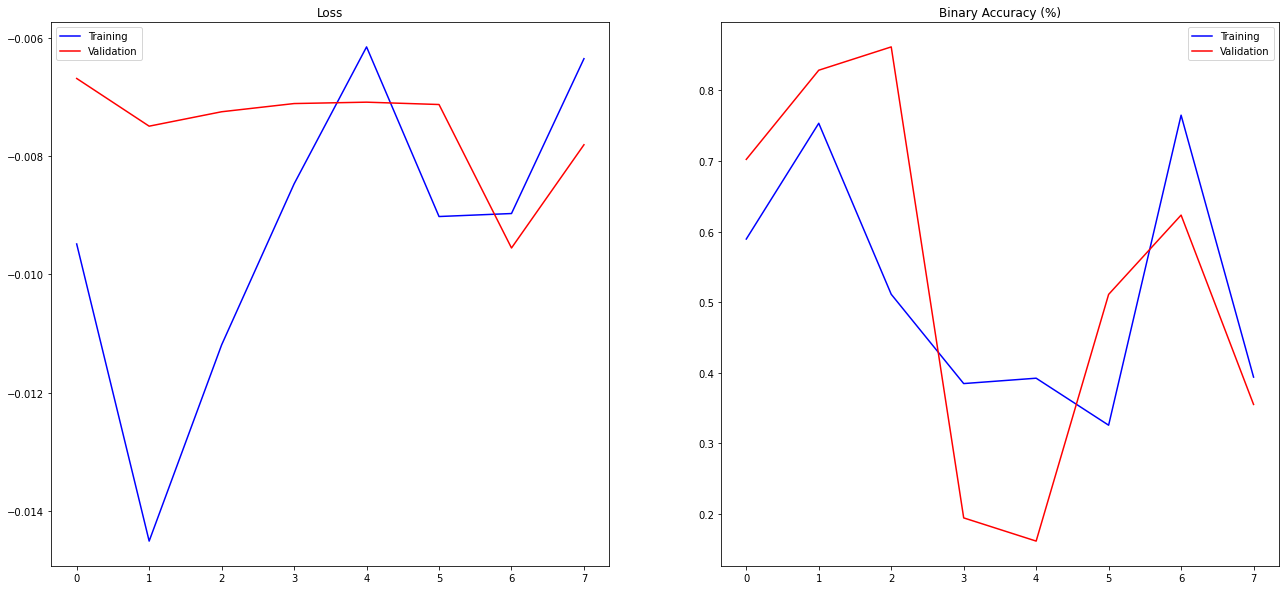

In [8]:
hl = fcn_model.validate(aug_gen, train_df.shape[0], valid_set=(valid_x, valid_y), epochs=8, train_steps=200)
fcn_model.show_loss(hl)

In [9]:
fcn_model.visualize_validation(valid_x, valid_y, load=True)

ValueError: Unsupported dtype

<Figure size 1440x14400 with 150 Axes>

ValueError: Unsupported dtype